In [7]:
# 39개 마커
MARKERS = ['LFHD', 'RFHD', 'LBHD', 'RBHD', 'C7', 'LSHO', 'RSHO', 'CLAV', 'RBAK',
           'LUPA', 'RUPA', 'STRN', 'T10', 'LELB', 'RELB', 'LFRM', 'RFRM',
           'LWRA', 'RWRA', 'LWRB', 'RWRB', 'LFIN', 'RFIN', 'LASI', 'RASI',
           'LPSI', 'RPSI', 'LTHI', 'RTHI', 'LKNE', 'RKNE', 'LTIB', 'RTIB',
           'LANK', 'RANK', 'LTOE', 'RTOE', 'LHEE', 'RHEE']
len(MARKERS)

39

In [205]:
MARKERS_PAIR = set([ m[1:] for m in MARKERS if m[0] == 'L' or m[0] == 'R' ])

In [8]:
import os
import glob

import pandas as pd
import numpy as np
from scipy.linalg import dft

import matplotlib.pyplot as plt

In [9]:
DATAPATH = "/Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD"
CONTROL = os.path.join(DATAPATH, "Controls")
PD = os.path.join(DATAPATH, "PD")

# df_patients = pd.read_csv(os.path.join(DATAPATH, "patients.csv"))
# df_null_info = pd.read_csv(os.path.join(DATAPATH, "NULL_info.csv"))
# df_csvinfo = pd.read_csv(os.path.join(DATAPATH, "csvinfo.csv"))

In [10]:
SAVEPATH = "/Users/sujinlee/Desktop/nims/pd/experiment3_dft"
SAVEFOLDER = os.path.join(SAVEPATH, "results_")

if os.path.exists(SAVEPATH) == False: os.makdir(SAVEPATH)
if os.path.exists(SAVEFOLDER) == False: os.mkdir(SAVEFOLDER)

In [214]:
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

In [11]:
df0 = pd.read_csv(os.path.join(PD, os.listdir(PD)[0]))

In [12]:
df0.head()

,Frame,Sub Frame,LFHD_X,LFHD_Y,LFHD_Z,RFHD_X,RFHD_Y,RFHD_Z,LBHD_X,LBHD_Y,...,RTOE_Z,CentreOfMass_X,CentreOfMass_Y,CentreOfMass_Z,CentreOfMassFloor_X,CentreOfMassFloor_Y,CentreOfMassFloor_Z,LHEE_Z_DIFF,RHEE_Z_DIFF,PHASE
0,465,0,-26.593998,-52.250732,1415.682187,93.093430,-53.191284,1408.825619,-30.274578,-203.833496,...,-6.930452,32.368675,-120.042114,800.641110,32.368675,-120.042114,-23.969791,0.162809,3.779896,1.0
1,466,0,-27.887154,-42.230102,1414.885067,91.775978,-43.365478,1407.859066,-31.902618,-193.728637,...,-6.962865,31.490170,-110.495117,799.904355,31.490170,-110.495117,-23.969791,0.314476,4.260330,1.0
2,467,0,-29.230495,-32.155273,1414.296811,90.402466,-33.495971,1407.088437,-33.606056,-183.548706,...,-6.979265,30.570805,-100.940307,799.305783,30.570805,-100.940307,-23.969791,0.432141,4.815636,1.0
3,468,0,-30.629456,-22.034423,1413.946469,88.974762,-23.585571,1406.555111,-35.374718,-173.298584,...,-6.972660,29.614188,-91.368774,798.880673,29.614188,-91.368774,-23.969791,0.511118,5.449150,1.0
4,469,0,-32.084473,-11.875854,1413.848935,87.499130,-13.640380,1406.288632,-37.196125,-162.987426,...,-6.937872,28.627365,-81.769165,798.655636,28.627365,-81.769165,-23.969791,0.550525,6.154419,1.0


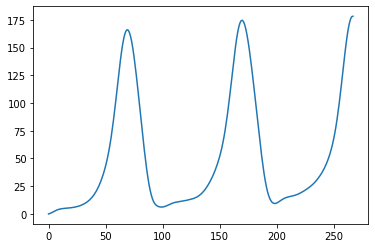

In [174]:
df0 = pd.read_csv(os.path.join(PD, os.listdir(PD)[0]))
plt.plot(df0["LHEE_Z"])
plt.show()

sampling rate: 100
N: 268


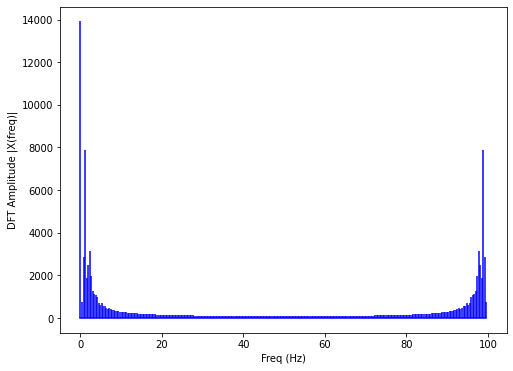

In [215]:
x = df0["LHEE_Z"]
X = DFT(x)

N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

print("sampling rate:", sr)
print("N:", N)
# print("n:", n)
# print("T:", T)
# print("freq:", freq)

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

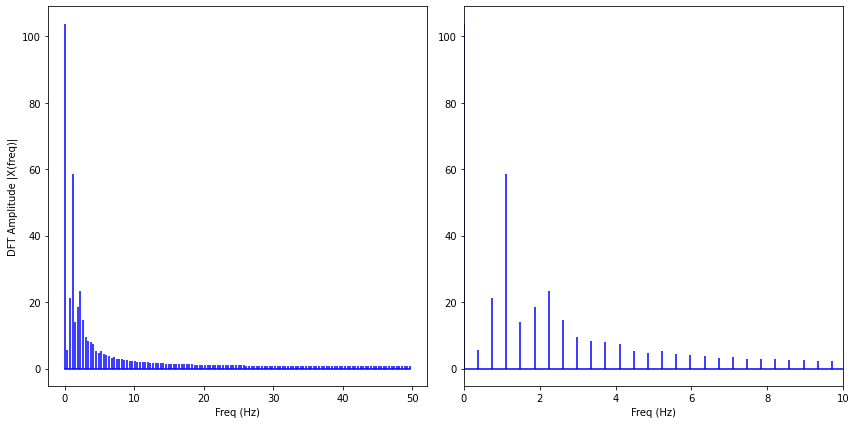

In [218]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

In [219]:
for idx in np.argsort(abs(X_oneside))[::-1]:
    if f_oneside[idx] != 0:
        print("         freq:", f_oneside[idx])
        print("DFT amplitude:", abs(X_oneside)[idx])
        break

         freq: 1.1194029850746268
DFT amplitude: 58.69392533697398


In [178]:
def get_result(df_sub, TARGET_MARKER_LR):
    x = df_sub[f"{TARGET_MARKER_LR}_Z"]
    X = DFT(x)

    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 
    
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]

    # normalize the amplitude
    X_oneside =X[:n_oneside]/n_oneside
    
    result_idx = -1;

    for idx in np.argsort(abs(X_oneside))[::-1]:
        if f_oneside[idx] != 0:
            result_idx = idx
#             print("         freq:", f_oneside[idx])
#             print("DFT amplitude:", abs(X_oneside)[idx])
            break
        
    return f_oneside[result_idx].copy(), X_oneside[result_idx].copy()

In [209]:
def dft_left_right(TARGET_CATE, TARGET_MOTION, TARGET_MARKER, WINDOW_SIZE, debug=True):
    results = []
    left_freq = []
    left_amp = []
    right_freq = []
    right_amp = []

    for csv_file in glob.glob(os.path.join(TARGET_CATE, f"*{TARGET_MOTION}*.csv")):
#         print(csv_file)
        df = pd.read_csv(os.path.join(TARGET_CATE, csv_file))
        df = df.dropna()

        if len(df) < WINDOW_SIZE: continue 

        df_sub = df.copy()
    #     print(csv_file, '|', len(df_sub))

        freq_left, amp_left = get_result(df_sub, f"L{TARGET_MARKER}")
        freq_right, amp_right = get_result(df_sub, f"R{TARGET_MARKER}")

        info = {"filename": csv_file,
                "length": len(df_sub),
                "freq_left": freq_left,
                "amp_left": amp_left,
                "freq_right": freq_right,
                "amp_right": amp_right,
               }
    #     print(info)
        left_freq.append(freq_left)
        left_amp.append(amp_left)
        right_freq.append(freq_right)
        right_amp.append(amp_right)

        results.append(info)
        
    if debug:
        print("Category:", TARGET_CATE)
        print("Motion:", TARGET_MOTION)
        print("Marker:", TARGET_MARKER)
    #     print("Window:", WINDOW_SIZE)
        print("Count:", len(results))
    #     print("Mean: ", np.mean(np.array(inner_product)))
    #     print("Std: ", np.std(np.array(inner_product)))

    #     plt.scatter(range(0, len(inner_product)), inner_product)
    #     plt.xlabel("Files")
    #     plt.ylabel("Inner product")
    #     plt.title("left & right inner product")
    #     plt.show()

    #     plt.hist(inner_product)
    #     plt.xlabel("Inner product")
    #     plt.ylabel("Count")
    #     plt.title("left & right inner product histogram")
    #     plt.show()

    return results, left_freq, left_amp, right_freq, right_amp

In [210]:
def run(TARGET_MOTION, TARGET_MARKER, WINDOW_SIZE, debug=True):
    
    pd_results, pd_left_freq, pd_left_amp, pd_right_freq, pd_right_amp = dft_left_right(TARGET_CATE=PD, TARGET_MOTION=TARGET_MOTION, TARGET_MARKER=TARGET_MARKER, WINDOW_SIZE=WINDOW_SIZE)
    control_results, control_left_freq, control_left_amp, control_right_freq, control_right_amp = dft_left_right(TARGET_CATE=CONTROL, TARGET_MOTION=TARGET_MOTION, TARGET_MARKER=TARGET_MARKER, WINDOW_SIZE=WINDOW_SIZE)

    if debug:
        print("------")
        print("Category: PD")
        print()
        print("LEFT Mean: ", np.mean(pd_left_freq))
        print("LEFT Std: ", np.std(pd_left_freq))
        print()
        print("RIGHT Mean: ", np.mean(pd_right_freq))
        print("RIGHT Std: ", np.std(pd_right_freq))

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].hist(pd_left_freq)
    axes[0].set_xlabel("Freq")
    axes[0].set_ylabel("Count")
    axes[0].set_title(f"PD - L{TARGET_MARKER}")
    # plt.show()

    axes[1].hist(pd_right_freq)
    axes[1].set_xlabel("Freq")
    axes[1].set_ylabel("Count")
    axes[1].set_title(f"PD - R{TARGET_MARKER}")
    plt.show()

    if debug:
        print()
        print("Category: Control")
        print()
        print("LEFT Mean: ", np.mean(control_left_freq))
        print("LEFT Std: ", np.std(control_left_freq))
        print()
        print("RIGHT Mean: ", np.mean(control_right_freq))
        print("RIGHT Std: ", np.std(control_right_freq))

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].hist(control_left_freq)
    axes[0].set_xlabel("Freq")
    axes[0].set_ylabel("Count")
    axes[0].set_title(f"Control - L{TARGET_MARKER}")
    # plt.show()

    axes[1].hist(control_right_freq)
    axes[1].set_xlabel("Freq")
    axes[1].set_ylabel("Count")
    axes[1].set_title(f"Control - R{TARGET_MARKER}")
    plt.show()

Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: HEE
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: HEE
Count: 35
------
Category: PD

LEFT Mean:  0.901606182925562
LEFT Std:  0.17290451053989656

RIGHT Mean:  0.9613770719499231
RIGHT Std:  0.2552108537777015


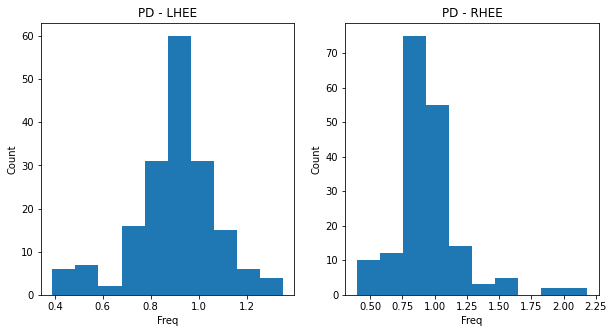


Category: Control

LEFT Mean:  0.8191276890858896
LEFT Std:  0.2938553536403469

RIGHT Mean:  0.8297096996679001
RIGHT Std:  0.27937054530468736


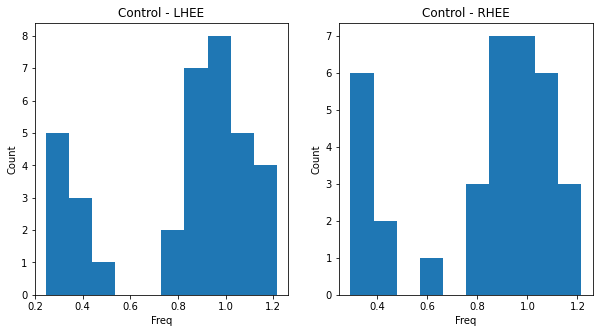

In [195]:
# run

TARGET_MOTION = "FW"
TARGET_MARKER = "HEE"
WINDOW_SIZE = 200

run(TARGET_MOTION, TARGET_MARKER, WINDOW_SIZE)

Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: TOE
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: TOE
Count: 35
------
Category: PD

LEFT Mean:  0.8839600634219168
LEFT Std:  0.1679719459433389

RIGHT Mean:  0.9019422779624412
RIGHT Std:  0.16678744669305043


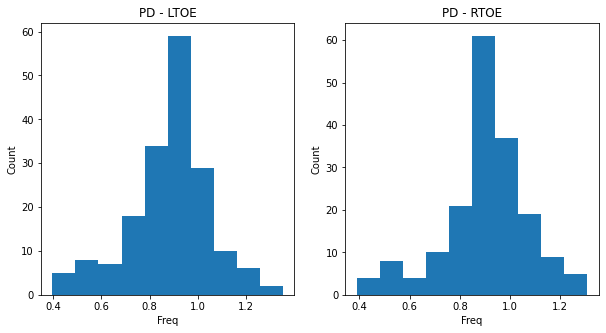


Category: Control

LEFT Mean:  0.8120730153645492
LEFT Std:  0.2836187760831642

RIGHT Mean:  0.8191276890858896
RIGHT Std:  0.2938553536403469


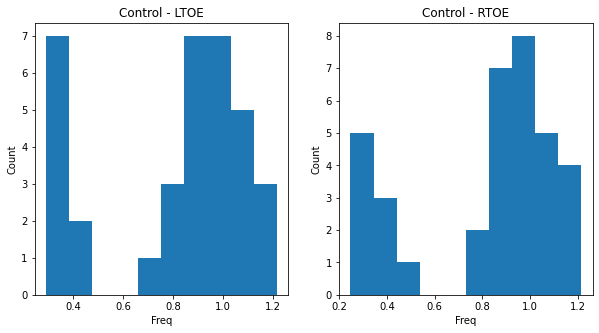

In [197]:
# run

TARGET_MOTION = "FW"
TARGET_MARKER = "TOE"
WINDOW_SIZE = 200

run(TARGET_MOTION, TARGET_MARKER, WINDOW_SIZE)

Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: KNE
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: KNE
Count: 35
------
Category: PD

LEFT Mean:  0.9674732219972282
LEFT Std:  0.3662450068529495

RIGHT Mean:  1.0527366452819011
RIGHT Std:  0.4114443029068974


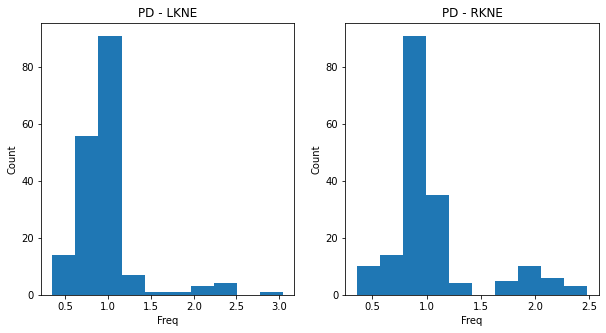


Category: Control

LEFT Mean:  0.8900978687350979
LEFT Std:  0.3655721988852837

RIGHT Mean:  1.2210429167631742
RIGHT Std:  0.650661108511297


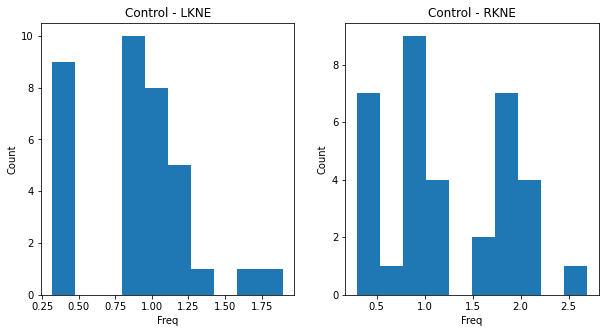

In [198]:
# run

TARGET_MOTION = "FW"
TARGET_MARKER = "KNE"
WINDOW_SIZE = 200

run(TARGET_MOTION, TARGET_MARKER, WINDOW_SIZE)

Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: HEE
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: HEE
Count: 35
------
Category: PD

LEFT Mean:  0.901606182925562
LEFT Std:  0.17290451053989656

RIGHT Mean:  0.9613770719499231
RIGHT Std:  0.2552108537777015


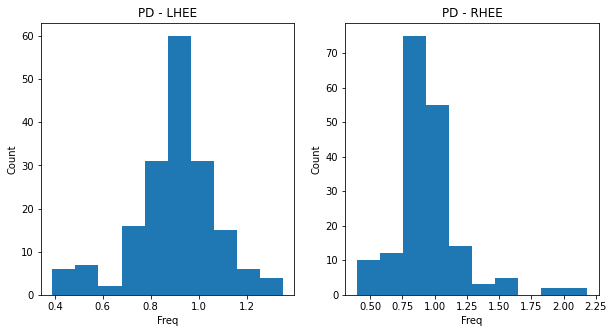


Category: Control

LEFT Mean:  0.8191276890858896
LEFT Std:  0.2938553536403469

RIGHT Mean:  0.8297096996679001
RIGHT Std:  0.27937054530468736


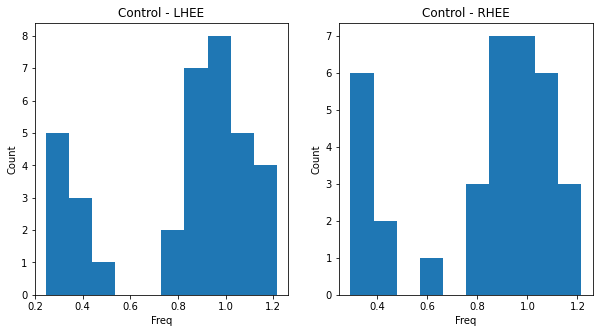

In [220]:
# run

TARGET_MOTION = "FW"
TARGET_MARKER = "HEE"
WINDOW_SIZE = 200

run(TARGET_MOTION, TARGET_MARKER, WINDOW_SIZE)


TARGET MARKER: UPA
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: UPA
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: UPA
Count: 35


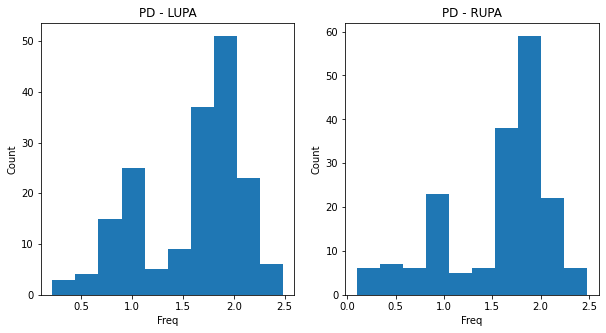

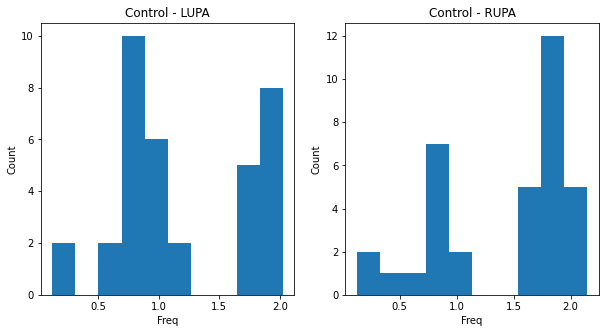


TARGET MARKER: ASI
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: ASI
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: ASI
Count: 35


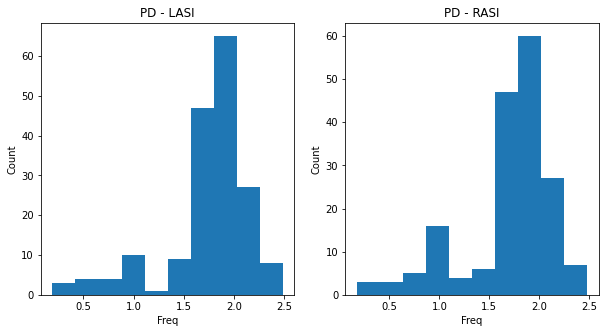

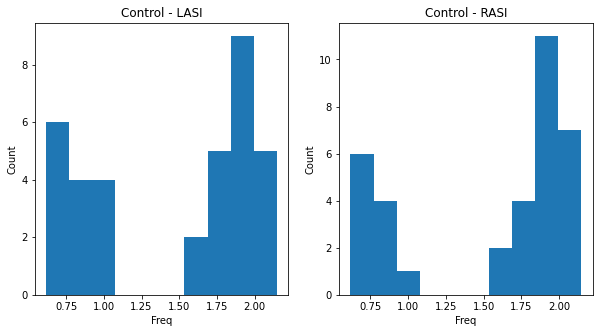


TARGET MARKER: WRA
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: WRA
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: WRA
Count: 35


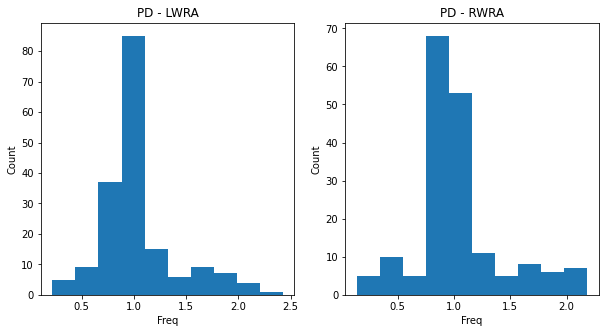

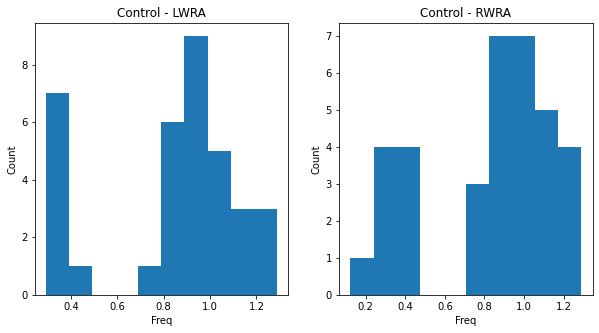


TARGET MARKER: FRM
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: FRM
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: FRM
Count: 35


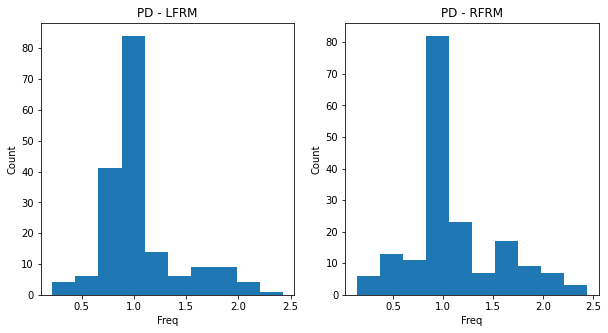

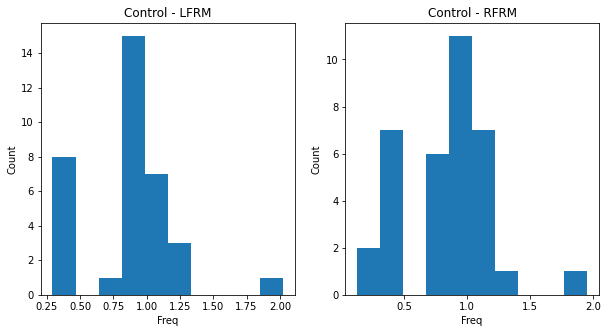


TARGET MARKER: PSI
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: PSI
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: PSI
Count: 35


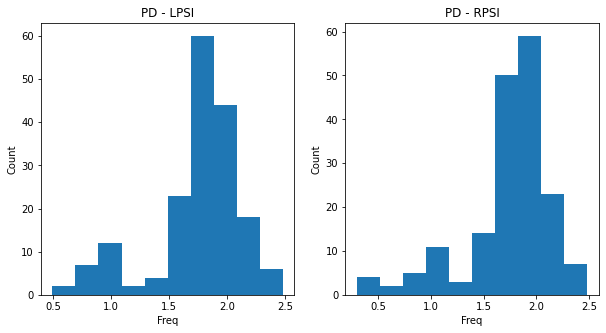

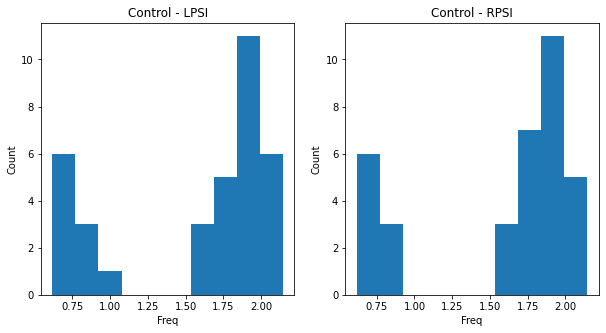


TARGET MARKER: WRB
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: WRB
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: WRB
Count: 35


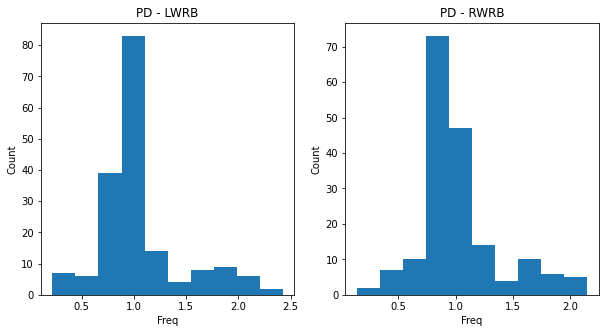

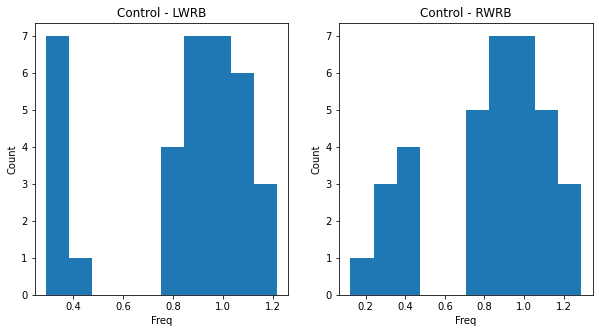


TARGET MARKER: FHD

TARGET MARKER: TIB
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: TIB
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: TIB
Count: 35


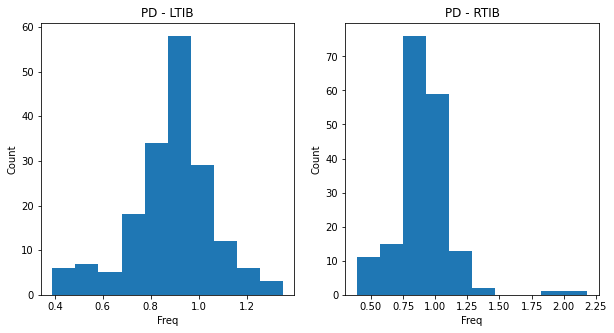

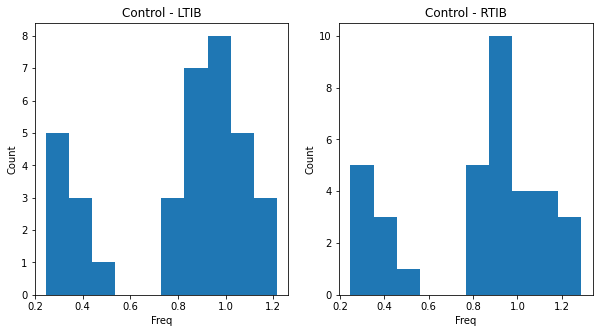


TARGET MARKER: BHD
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: BHD
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: BHD
Count: 35


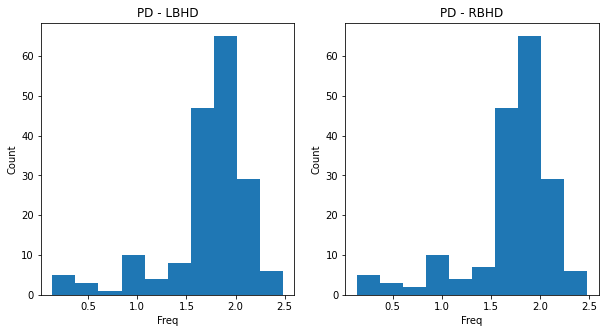

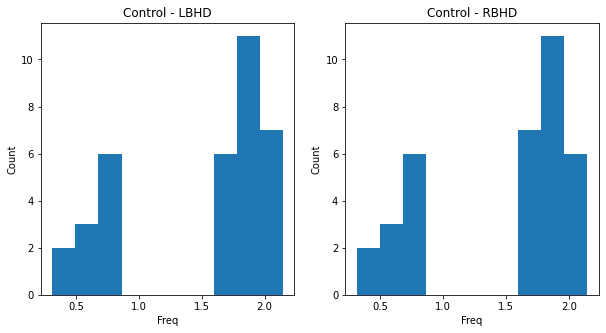


TARGET MARKER: ANK
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: ANK
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: ANK
Count: 35


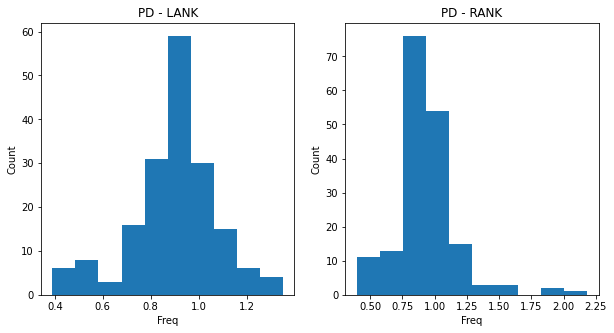

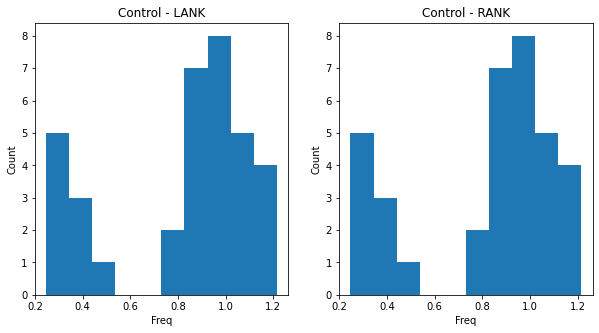


TARGET MARKER: FIN
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: FIN
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: FIN
Count: 35


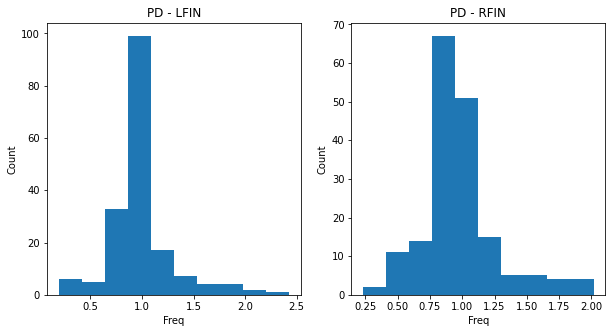

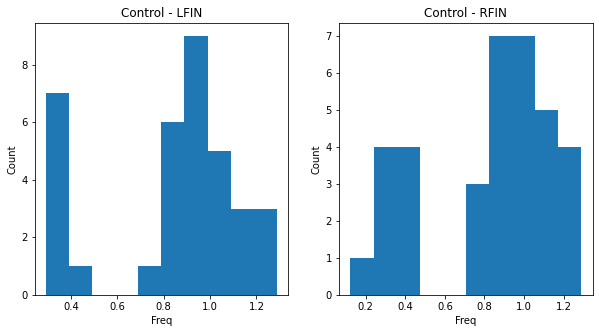


TARGET MARKER: HEE
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: HEE
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: HEE
Count: 35


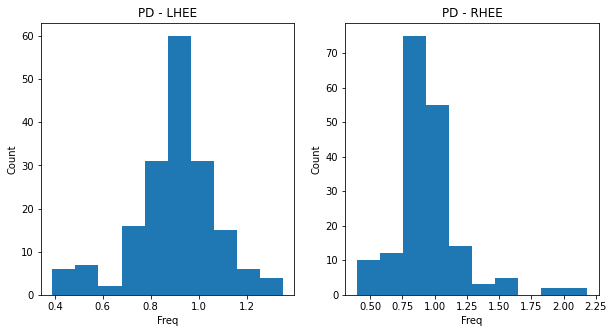

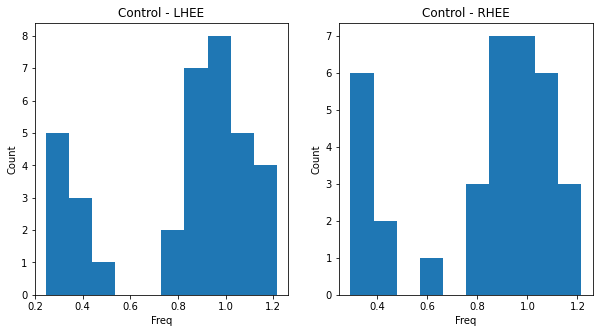


TARGET MARKER: BAK

TARGET MARKER: SHO
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: SHO
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: SHO
Count: 35


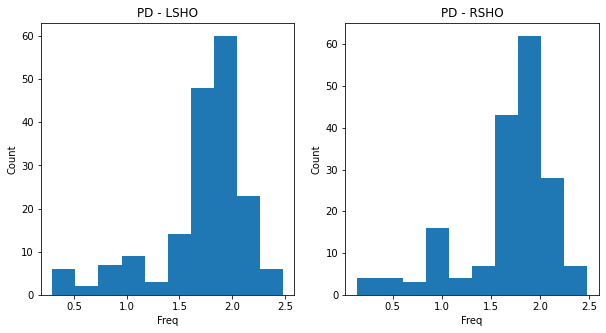

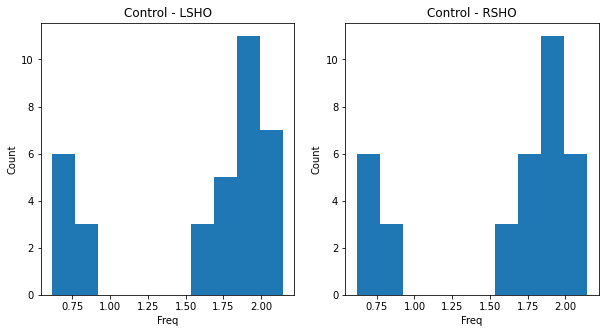


TARGET MARKER: ELB
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: ELB
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: ELB
Count: 35


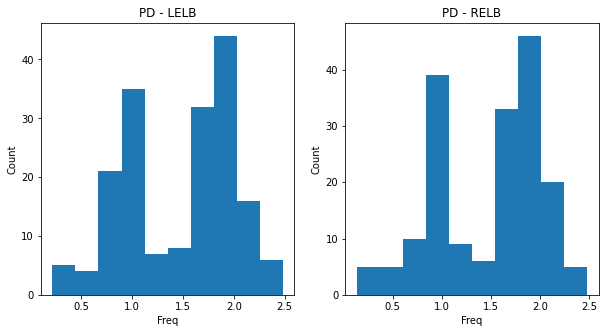

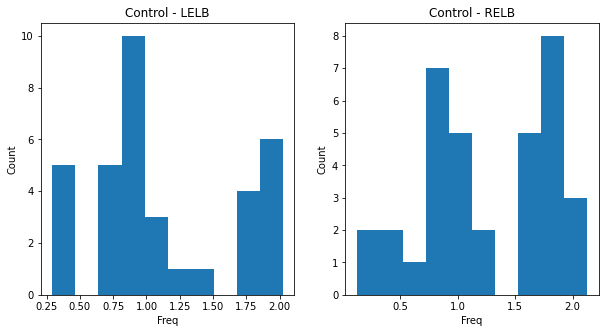


TARGET MARKER: KNE
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: KNE
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: KNE
Count: 35


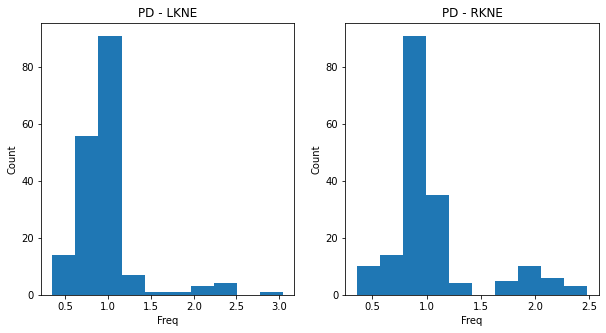

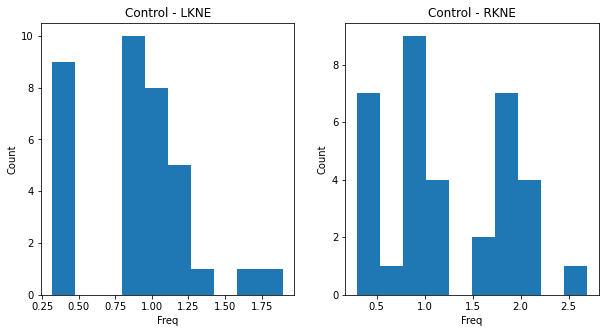


TARGET MARKER: TOE
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: TOE
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: TOE
Count: 35


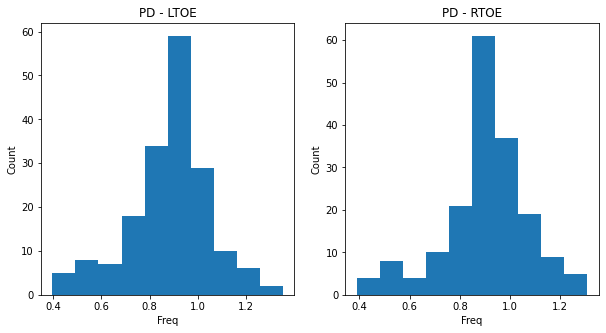

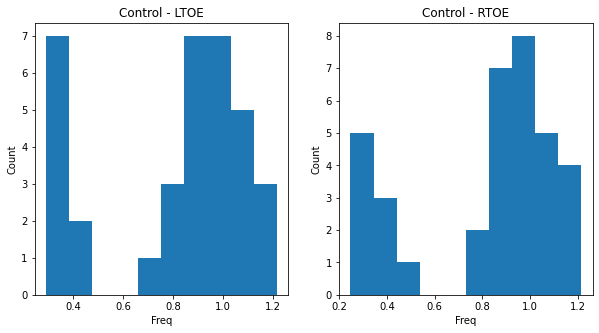


TARGET MARKER: THI
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/PD
Motion: FW
Marker: THI
Count: 178
Category: /Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_STD/Controls
Motion: FW
Marker: THI
Count: 35


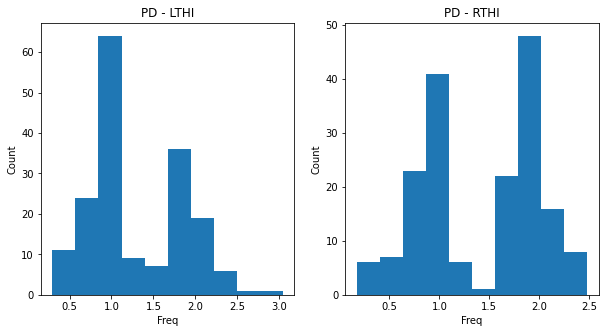

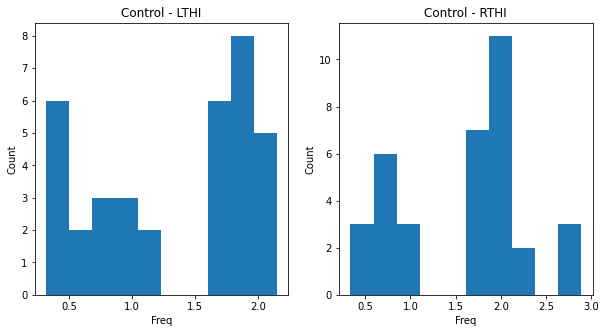

In [213]:
TARGET_MOTION = "FW"
WINDOW_SIZE = 200

for TARGET_MARKER in MARKERS_PAIR:
    print()
    print("TARGET MARKER:", TARGET_MARKER)

    try:
        run(TARGET_MOTION, TARGET_MARKER, WINDOW_SIZE, debug=False)
    except:
        pass